# Data exploration

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# loading the data
train = pd.read_csv('train_bank.csv')
test = pd.read_csv('test_bank.csv')

In [4]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [8]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [9]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [10]:
train.shape, test.shape

((31647, 18), (13564, 17))

# Univariate analysis

In [11]:
# At first, plot the charts and graphs
train["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [12]:
# normalize can be set to true to print proportions instead of false
train["subscribed"].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

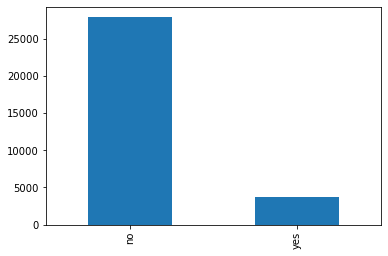

In [13]:
train["subscribed"].value_counts().plot.bar()

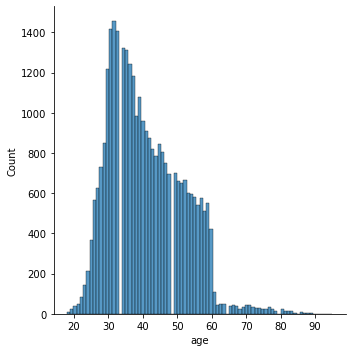

In [14]:
# Now to check whether the graphs are left or right skewed
sns.displot(train["age"])

<AxesSubplot:>

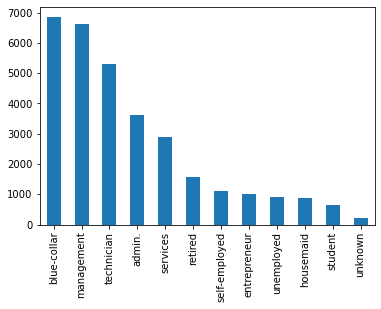

In [15]:
train["job"].value_counts().plot.bar()

<AxesSubplot:>

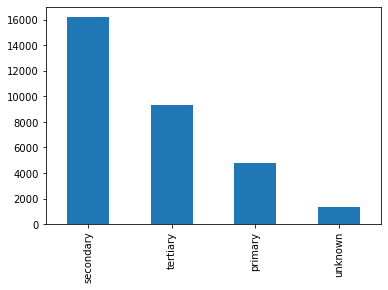

In [16]:
train["education"].value_counts().plot.bar()

<AxesSubplot:>

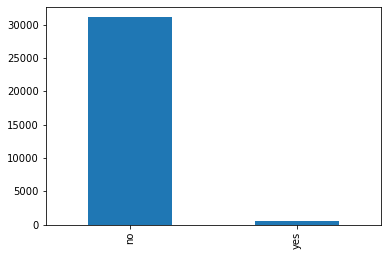

In [17]:
train["default"].value_counts().plot.bar()

# Bivariate analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


<AxesSubplot:xlabel='job'>

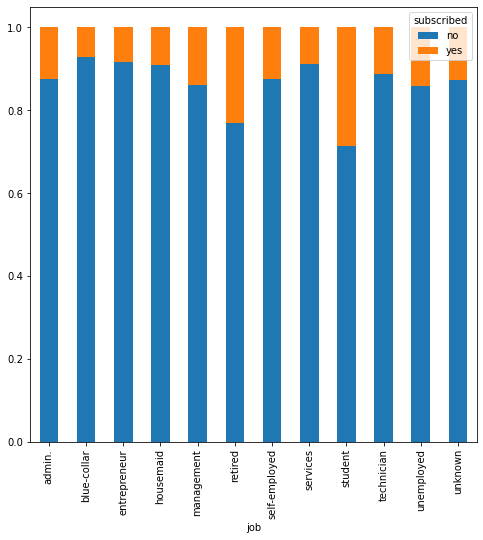

In [23]:
print(pd.crosstab(train["job"], train["subscribed"]))
job = pd.crosstab(train["job"], train["subscribed"])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

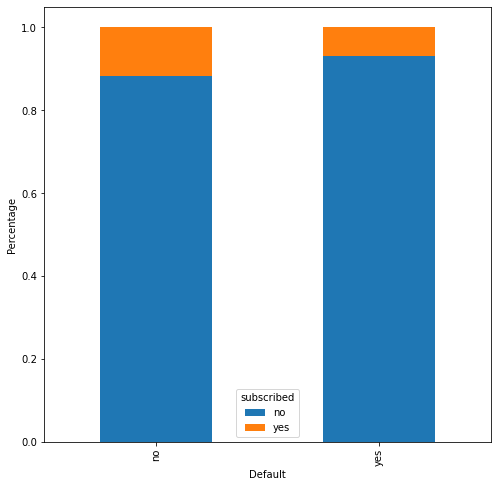

In [21]:
# Let's explore the default against the subscribed value
print(pd.crosstab(train["default"], train["subscribed"]))
default = pd.crosstab(train["default"], train["subscribed"])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel("Default")
plt.ylabel("Percentage")

In [24]:
# Now we want to replace our target variable to numerical values
train["subscribed"].replace("no", 0, inplace=True)
train["subscribed"].replace("yes", 1, inplace=True)

<AxesSubplot:>

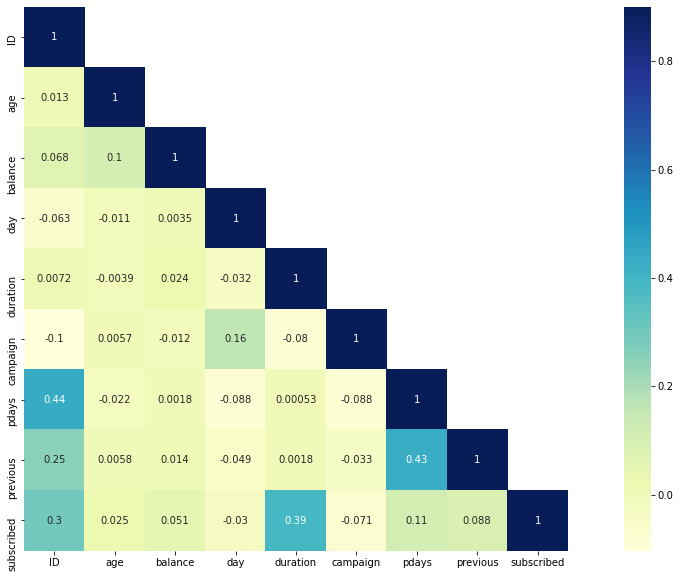

In [31]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [32]:
# Now, it's time to look at the missing values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [33]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Model Building

In [34]:
target = train["subscribed"]
train = train.drop("subscribed", 1)

In [36]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
# splitting the dataset into 80% training set and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lreg = LogisticRegression()

In [46]:
# Fitting the model on the train datasets
lreg.fit(X_train, y_train)

D:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# making prediction on the validation dataset
pred = lreg.predict(X_val)

In [48]:
# Now, evaluating the accuracy of our model
from sklearn.metrics import accuracy_score

In [50]:
# Score on the validation dataset
score = accuracy_score(y_val, pred)
print(score)

0.8875197472353871


# Decision trees

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier(max_depth=4, random_state=0)

In [56]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [57]:
predict = dt.predict(X_val)

In [58]:
new_score = accuracy_score(y_val, predict)
print(new_score)

0.9042654028436019


In [59]:
test = pd.get_dummies(test)

In [61]:
test_prediction = dt.predict(test)

In [62]:
# Saving these predictions on a csv file
submission_bank = pd.DataFrame()

In [63]:
submission_bank["ID"] = test["ID"]
submission_bank["subscribed"] = test_prediction

In [65]:
# Converting the numerical values to 'yes' and 'no'
submission_bank['subscribed'].replace(0,'no',inplace=True)
submission_bank['subscribed'].replace(1,'yes',inplace=True)

In [66]:
submission_bank.to_csv("submission_bank.csv", header=True, index=False)